In [2]:
import midi
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [3]:
mid = midi.read_midifile('data/no_quarter/NoQuarter.mid')

In [4]:
types = set([])
for timestep in mid:
    for _ in timestep:
        if _ not in types: types.add(type(_))

In [5]:
types

{midi.events.ControlChangeEvent,
 midi.events.EndOfTrackEvent,
 midi.events.KeySignatureEvent,
 midi.events.LyricsEvent,
 midi.events.NoteOnEvent,
 midi.events.PortEvent,
 midi.events.ProgramChangeEvent,
 midi.events.SetTempoEvent,
 midi.events.TimeSignatureEvent,
 midi.events.TrackNameEvent}

In [6]:
events = list(mid)

In [7]:
events[0]

midi.Track(\
  [midi.TimeSignatureEvent(tick=0, data=[4, 2, 24, 8]),
   midi.KeySignatureEvent(tick=0, data=[4, 0]),
   midi.SetTempoEvent(tick=0, data=[13, 118, 177]),
   midi.EndOfTrackEvent(tick=0, data=[])])

In [8]:
print(events[2])

midi.Track(\
  [midi.PortEvent(tick=0, data=[0]),
   midi.TrackNameEvent(tick=0, text='Electric Piano Mod', data=[69, 108, 101, 99, 116, 114, 105, 99, 32, 80, 105, 97, 110, 111, 32, 77, 111, 100]),
   midi.ProgramChangeEvent(tick=0, channel=10, data=[79]),
   midi.ControlChangeEvent(tick=0, channel=10, data=[7, 100]),
   midi.ControlChangeEvent(tick=0, channel=10, data=[10, 64]),
   midi.ControlChangeEvent(tick=1938, channel=10, data=[1, 99]),
   midi.NoteOnEvent(tick=72, channel=10, data=[68, 48]),
   midi.NoteOnEvent(tick=90, channel=10, data=[68, 0]),
   midi.NoteOnEvent(tick=30, channel=10, data=[71, 49]),
   midi.NoteOnEvent(tick=90, channel=10, data=[71, 0]),
   midi.NoteOnEvent(tick=30, channel=10, data=[73, 49]),
   midi.NoteOnEvent(tick=60, channel=10, data=[73, 0]),
   midi.NoteOnEvent(tick=30, channel=10, data=[75, 49]),
   midi.NoteOnEvent(tick=150, channel=10, data=[75, 0]),
   midi.NoteOnEvent(tick=30, channel=10, data=[71, 50]),
   midi.NoteOnEvent(tick=30, channel=10, d

First channel of file seems to be metadata about playback — time signature, key signature, tempo

In [9]:
for _ in events[1:]: print(_[0])

midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])
midi.PortEvent(tick=0, data=[0])


First event on rest of channels is a `PortEvent`

In [10]:
for i, _ in enumerate(events[1:]): print('Track {}: {}'.format(i+1, _[1].text))

Track 1: Vocal
Track 2: Electric Piano Mod
Track 3: Electric Piano Upper
Track 4: Electric Piano Lower
Track 5: Accoustic Piano
Track 6: Guitar 1
Track 7: Guitar 2
Track 8: Pedal Bass
Track 9: Bass 
Track 10: Drums
Track 11: Clean Guitar
Track 12: Backup Vocal
Track 13: Fuzz Guitar
Track 14: Echo Fuzz Guitar
Track 15: Swish
Track 16: " No Quarter "
Track 17: by Led Zeppelin
Track 18: © 1973 
Track 19: Sequenced by
Track 20: LowCPM  ( c : =
Track 21: Comments?  Email to:
Track 22: lowcpm@onramp.net


Tracks 1-15 seem to be actual instrument channels, rest of them metadata?

In [11]:
for i, _ in enumerate(events[16:]): print([type(x) for x in _])

[<class 'midi.events.PortEvent'>, <class 'midi.events.TrackNameEvent'>, <class 'midi.events.EndOfTrackEvent'>]
[<class 'midi.events.PortEvent'>, <class 'midi.events.TrackNameEvent'>, <class 'midi.events.EndOfTrackEvent'>]
[<class 'midi.events.PortEvent'>, <class 'midi.events.TrackNameEvent'>, <class 'midi.events.EndOfTrackEvent'>]
[<class 'midi.events.PortEvent'>, <class 'midi.events.TrackNameEvent'>, <class 'midi.events.EndOfTrackEvent'>]
[<class 'midi.events.PortEvent'>, <class 'midi.events.TrackNameEvent'>, <class 'midi.events.EndOfTrackEvent'>]
[<class 'midi.events.PortEvent'>, <class 'midi.events.TrackNameEvent'>, <class 'midi.events.EndOfTrackEvent'>]
[<class 'midi.events.PortEvent'>, <class 'midi.events.TrackNameEvent'>, <class 'midi.events.EndOfTrackEvent'>]


All tracks follow same structure — `PortEvent`, `TrackNameEvent`, `EndOfTrackEvent`, so they are just metadata. Thus, we are interested in tracks 1-15. Let's investigate these tracks as the input.

Track 1: 665 events
Track 2: 261 events
Track 3: 2936 events
Track 4: 1025 events
Track 5: 417 events
Track 6: 365 events
Track 7: 1564 events
Track 8: 908 events
Track 9: 54 events
Track 10: 2382 events
Track 11: 54 events
Track 12: 194 events
Track 13: 348 events
Track 14: 741 events
Track 15: 230 events


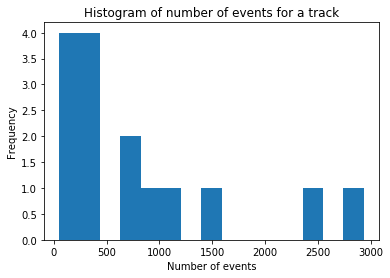

In [12]:
n_events = [len(_) for _ in events[1:16]]
for i, _ in enumerate(n_events): 
    print('Track {}: {} events'.format(i+1, _))

plt.hist(n_events, bins=15)
plt.title('Histogram of number of events for a track')
plt.xlabel('Number of events')
plt.ylabel('Frequency')
plt.show()

So we have our 15 tracks, each with varying numbers of events. 

In [13]:
n_data = {i: [len(events[i][j].data) for j in range(len(events[i]))] for i in range(1, 16)}
mean_data_lens = []
print('{:7s} | {:8s} | {:12s} | {}'.format('track', 'n events', 'avg data len', 'avg data len by n events'))
print('='*60)
for n_track, len_data in n_data.items():
    mean_len_data = np.mean(len_data)
    mean_data_lens.append(mean_len_data)
    print('{:7d} | {:8d} | {:12f} | {:12f}'.format(n_track, 
                                               n_events[n_track-1], 
                                               mean_len_data, 
                                               mean_len_data/n_events[n_track-1]))

track   | n events | avg data len | avg data len by n events
      1 |      665 |     2.569925 |     0.003865
      2 |      261 |     2.045977 |     0.007839
      3 |     2936 |     2.004768 |     0.000683
      4 |     1025 |     2.013659 |     0.001965
      5 |      417 |     2.021583 |     0.004848
      6 |      365 |     2.005479 |     0.005494
      7 |     1564 |     2.001279 |     0.001280
      8 |      908 |     2.004405 |     0.002207
      9 |       54 |     1.981481 |     0.036694
     10 |     2382 |     2.000000 |     0.000840
     11 |       54 |     2.111111 |     0.039095
     12 |      194 |     2.030928 |     0.010469
     13 |      348 |     2.014368 |     0.005788
     14 |      741 |     2.013495 |     0.002717
     15 |      230 |     1.995652 |     0.008677


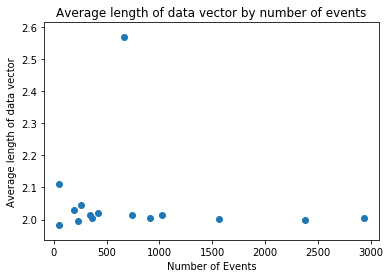

In [14]:
plt.scatter(n_events, mean_data_lens)
plt.title('Average length of data vector by number of events')
plt.xlabel('Number of Events')
plt.ylabel('Average length of data vector')
plt.show()

In [15]:
# find outlier
outlier_track = [i+1 for (i, _) in enumerate(mean_data_lens) if _ > 2.3][0]
print(set([str(type(_)) for _ in events[outlier_track]]))

{"<class 'midi.events.EndOfTrackEvent'>", "<class 'midi.events.PortEvent'>", "<class 'midi.events.LyricsEvent'>", "<class 'midi.events.ControlChangeEvent'>", "<class 'midi.events.NoteOnEvent'>", "<class 'midi.events.TrackNameEvent'>", "<class 'midi.events.ProgramChangeEvent'>"}


So most data vectors have an average length of 2.0-2.1, indicating that they're typical instrument tracks with pitch/velocity bytes. The outlier track, we see, is the Vocal track, which is sensible as lyrics can be arbitrarily long.

In [16]:
instrument_tracks = events[1:(outlier_track+1)] + events[(outlier_track+1):16]

In [17]:
for track in instrument_tracks:
    pattern = midi.Pattern(format=mid.format, resolution=mid.resolution, tick_relative=mid.tick_relative)
    pattern.append(events[0])
    pattern.append(track)
    midi.write_midifile('data/no_quarter/tracks/{}_track_no_quarter.mid'.format(track[1].text), pattern)

Preliminary general workflow: 

1. Collate train/test corpus
   * Put songs together sequentially, then train on whole time series?
   * How to resolve track differences? 
   * Find 
2. 

In [18]:
pattern = midi.Pattern()
timeSpec = copy.deepcopy(mid[0])
timeSpec[2].set_bpm(120)
timeSpec[2].set_mpqn(500000)
pattern.append(timeSpec)
track = midi.Track()
pattern.append(track)
track.append(midi.PortEvent(tick=0, data=[0]))
track.append(midi.TrackNameEvent(tick=0, text='Thank you Kanye, very cool!', data=[69, 108, 101, 99, 116, 114, 105, 99, 32, 80, 105, 97, 110, 111, 32, 77, 111, 100]),)
track.append(midi.ProgramChangeEvent(tick=0, channel=10, data=[79]))

f = lambda x: np.array([int(_) for _ in x])

note_low = 57+16
note_high = 69+16
n = note_high - note_low + 1
space = f(np.sqrt(np.linspace(note_low, note_high, n, dtype=int)**2))
N = np.sum(space)

hold_low = 0
hold_high = 99
n = hold_high - hold_low + 1
hold_space = np.linspace(note_low, note_high, n, dtype=int)
hold_N = np.sum(hold_space)

for i in range(2, 100):
    p = np.random.choice(space, p=space/N)
    track.append(midi.NoteOnEvent(tick=16*int(np.log(i)), channel=1, data=[p, 127]))
    track.append(midi.NoteOnEvent(tick=16*int(np.log(i))+np.random.choice(100, p=hold_space/hold_N), channel=10, data=[p, 0]))
    
track.append(midi.EndOfTrackEvent(tick=track[-1].tick, data=[]))
    
# track.append(midi.EndOfTrackEvent(tick=100))
midi.write_midifile("data/no_quarter/tracks/example.mid", pattern)